### Import Libraries

In [1]:
#Major libraries
import pandas as pd
import numpy as np

#Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns

#scikit-learn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_random
import re, string
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.exceptions import UndefinedMetricWarning

# Suppress UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

## Data Summary and Cleaning

In [2]:
df=pd.read_csv("Age_Prediction.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       3000 non-null   object 
 1   Height (cm)                  3000 non-null   float64
 2   Weight (kg)                  3000 non-null   float64
 3   Blood Pressure (s/d)         3000 non-null   object 
 4   Cholesterol Level (mg/dL)    3000 non-null   float64
 5   BMI                          3000 non-null   float64
 6   Blood Glucose Level (mg/dL)  3000 non-null   float64
 7   Bone Density (g/cm²)         3000 non-null   float64
 8   Vision Sharpness             3000 non-null   float64
 9   Hearing Ability (dB)         3000 non-null   float64
 10  Physical Activity Level      3000 non-null   object 
 11  Smoking Status               3000 non-null   object 
 12  Alcohol Consumption          1799 non-null   object 
 13  Diet              

In [4]:
df.head()

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,...,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,...,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,...,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70
3,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,...,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52
4,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,...,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79


In [5]:
df.tail()

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
2995,Male,161.632502,88.323405,134/91,204.175510,33.807917,112.075747,1.583006,0.665907,27.997736,...,Diabetes,57.820282,Fair,Normal,8.091897,9.846088,9.111205,Undergraduate,High,22
2996,Male,163.443512,93.217007,110/78,197.384424,34.894725,101.177692,1.785129,0.720304,32.866623,...,Heart Disease,68.783715,Good,Normal,2.427081,1.141303,8.578184,Undergraduate,Medium,19
2997,Male,177.857644,86.258847,159/116,238.641542,27.268332,110.548146,0.366012,0.200000,39.756270,...,NaN,50.133807,Fair,Normal,7.671837,5.101134,2.199199,Undergraduate,Low,85
2998,Female,162.287164,41.371018,134/82,198.244328,15.708252,123.704379,1.452963,0.648158,43.338594,...,Hypertension,68.864629,Good,Insomnia,7.920076,4.452130,5.051613,NaN,High,30
2999,Male,175.341710,78.718038,167/91,279.118184,25.603762,156.577316,0.704319,0.578625,43.926230,...,Hypertension,60.892114,Poor,Insomnia,8.013913,4.624968,3.745138,High School,High,66


In [6]:
df.isna().sum()

Gender                            0
Height (cm)                       0
Weight (kg)                       0
Blood Pressure (s/d)              0
Cholesterol Level (mg/dL)         0
BMI                               0
Blood Glucose Level (mg/dL)       0
Bone Density (g/cm²)              0
Vision Sharpness                  0
Hearing Ability (dB)              0
Physical Activity Level           0
Smoking Status                    0
Alcohol Consumption            1201
Diet                              0
Chronic Diseases               1299
Medication Use                 1198
Family History                 1451
Cognitive Function                0
Mental Health Status              0
Sleep Patterns                    0
Stress Levels                     0
Pollution Exposure                0
Sun Exposure                      0
Education Level                 627
Income Level                      0
Age (years)                       0
dtype: int64

In [7]:
df

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,...,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,...,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,...,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70
3,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,...,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52
4,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,...,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Male,161.632502,88.323405,134/91,204.175510,33.807917,112.075747,1.583006,0.665907,27.997736,...,Diabetes,57.820282,Fair,Normal,8.091897,9.846088,9.111205,Undergraduate,High,22
2996,Male,163.443512,93.217007,110/78,197.384424,34.894725,101.177692,1.785129,0.720304,32.866623,...,Heart Disease,68.783715,Good,Normal,2.427081,1.141303,8.578184,Undergraduate,Medium,19
2997,Male,177.857644,86.258847,159/116,238.641542,27.268332,110.548146,0.366012,0.200000,39.756270,...,NaN,50.133807,Fair,Normal,7.671837,5.101134,2.199199,Undergraduate,Low,85
2998,Female,162.287164,41.371018,134/82,198.244328,15.708252,123.704379,1.452963,0.648158,43.338594,...,Hypertension,68.864629,Good,Insomnia,7.920076,4.452130,5.051613,NaN,High,30


In [8]:
df.dropna()

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
8,Female,164.546917,74.405356,152/119,204.235608,27.480504,137.022297,1.047384,0.505928,54.105122,...,Diabetes,64.702746,Fair,Insomnia,1.392434,9.945505,5.639334,High School,High,50
12,Male,173.338256,102.464068,145/108,289.219136,34.102228,124.845940,0.651341,0.402461,84.370333,...,Heart Disease,61.341635,Fair,Normal,2.156503,8.112042,9.847674,Undergraduate,High,65
13,Female,159.081403,67.075983,151/79,193.210429,26.505025,102.106584,1.792692,0.745991,37.794355,...,Hypertension,70.661083,Fair,Normal,3.250148,5.805440,10.405399,Undergraduate,Low,25
14,Male,180.777914,89.762116,143/101,220.229793,27.466438,139.479575,1.024116,0.615397,40.789595,...,Diabetes,59.769053,Fair,Insomnia,8.124211,7.896181,1.094473,High School,Low,47
16,Female,165.885349,70.360265,154/109,233.277936,25.568863,133.941160,0.983522,0.399878,50.240925,...,Diabetes,63.325924,Fair,Normal,9.110422,0.454464,3.371558,Postgraduate,High,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,Female,159.986635,66.470851,161/106,279.793544,25.969515,147.392409,0.543465,0.415831,47.283306,...,Heart Disease,55.146851,Fair,Normal,4.121429,2.019825,8.573972,Undergraduate,High,74
2966,Male,170.795008,83.053739,162/89,228.003562,28.471401,149.900801,0.863500,0.553612,54.041099,...,Diabetes,76.114848,Poor,Normal,9.050376,5.063930,8.984893,High School,Medium,54
2968,Female,166.153566,43.082307,144/103,208.249288,15.605570,126.197608,1.209967,0.579894,51.492807,...,Diabetes,61.594551,Fair,Normal,1.556713,2.470068,9.062809,Undergraduate,Low,51
2981,Female,159.996625,69.706681,125/99,216.291413,27.230321,114.214435,1.358058,0.670803,23.416874,...,Hypertension,85.371876,Excellent,Insomnia,6.330091,5.742652,7.180550,Postgraduate,Medium,32


We lose a lot of data if we drop rowswith null value.

In [9]:
df[['Alcohol Consumption','Age (years)']]

,Alcohol Consumption,Age (years)
0,NaN,89
1,Occasional,77
2,NaN,70
3,NaN,52
4,Frequent,79
...,...,...
2995,NaN,22
2996,Occasional,19
2997,NaN,85
2998,Frequent,30


In [10]:
df['Alcohol Consumption'].unique()

array([nan, 'Occasional', 'Frequent'], dtype=object)

#### Replace null values in the 'Alcohol Consumption' column with 'Never'

In [11]:

df.fillna({'Alcohol Consumption':'Never'}, inplace=True)

In [12]:
df['Alcohol Consumption'].unique()

array(['Never', 'Occasional', 'Frequent'], dtype=object)

### Let's replace other columns' NULL values  as well

In [13]:
df['Medication Use'].unique()

array([nan, 'Regular', 'Occasional'], dtype=object)

In [14]:
df.fillna({'Medication Use':'None'}, inplace=True)

In [15]:
df['Medication Use'].unique()

array(['None', 'Regular', 'Occasional'], dtype=object)

In [16]:
df['Chronic Diseases'].unique()

array([nan, 'Hypertension', 'Diabetes', 'Heart Disease'], dtype=object)

In [17]:
df.fillna({'Chronic Diseases':'None'}, inplace=True)

In [18]:
df['Chronic Diseases'].unique()

array(['None', 'Hypertension', 'Diabetes', 'Heart Disease'], dtype=object)

In [19]:
df['Family History'].unique()

array([nan, 'Heart Disease', 'Hypertension', 'Diabetes'], dtype=object)

In [20]:
df.fillna({'Family History':'None'}, inplace=True)

In [21]:
df['Family History'].unique()

array(['None', 'Heart Disease', 'Hypertension', 'Diabetes'], dtype=object)

### Let's drop Null values from Education column since they are few

In [22]:
df.dropna(inplace=True)

In [23]:
df.isna().sum()

Gender                         0
Height (cm)                    0
Weight (kg)                    0
Blood Pressure (s/d)           0
Cholesterol Level (mg/dL)      0
BMI                            0
Blood Glucose Level (mg/dL)    0
Bone Density (g/cm²)           0
Vision Sharpness               0
Hearing Ability (dB)           0
Physical Activity Level        0
Smoking Status                 0
Alcohol Consumption            0
Diet                           0
Chronic Diseases               0
Medication Use                 0
Family History                 0
Cognitive Function             0
Mental Health Status           0
Sleep Patterns                 0
Stress Levels                  0
Pollution Exposure             0
Sun Exposure                   0
Education Level                0
Income Level                   0
Age (years)                    0
dtype: int64

In [24]:
df.drop('Blood Pressure (s/d)',axis=1,inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2373 entries, 1 to 2999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       2373 non-null   object 
 1   Height (cm)                  2373 non-null   float64
 2   Weight (kg)                  2373 non-null   float64
 3   Cholesterol Level (mg/dL)    2373 non-null   float64
 4   BMI                          2373 non-null   float64
 5   Blood Glucose Level (mg/dL)  2373 non-null   float64
 6   Bone Density (g/cm²)         2373 non-null   float64
 7   Vision Sharpness             2373 non-null   float64
 8   Hearing Ability (dB)         2373 non-null   float64
 9   Physical Activity Level      2373 non-null   object 
 10  Smoking Status               2373 non-null   object 
 11  Alcohol Consumption          2373 non-null   object 
 12  Diet                         2373 non-null   object 
 13  Chronic Diseases       

In [26]:
df.corr(numeric_only=True)

,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Stress Levels,Pollution Exposure,Sun Exposure,Age (years)
Height (cm),1.000000,0.397297,-0.024029,-0.221887,-0.002985,-0.033911,-0.019675,0.017398,0.026756,-0.006796,-0.029752,-0.009776,0.029114
Weight (kg),0.397297,1.000000,0.053596,0.801449,0.026278,-0.007170,-0.004021,0.010455,-0.005766,0.017932,-0.025020,-0.014931,0.003910
Cholesterol Level (mg/dL),-0.024029,0.053596,1.000000,0.075081,0.162477,-0.390764,-0.367226,0.319622,-0.230330,0.000929,-0.004714,0.012537,0.419600
BMI,-0.221887,0.801449,0.075081,1.000000,0.032702,0.011452,0.006025,0.001743,-0.025061,0.022654,-0.005682,-0.010667,-0.013021
Blood Glucose Level (mg/dL),-0.002985,0.026278,0.162477,0.032702,1.000000,-0.381302,-0.383575,0.294138,-0.212856,-0.033233,0.007334,0.033609,0.416911
Bone Density (g/cm²),-0.033911,-0.007170,-0.390764,0.011452,-0.381302,1.000000,0.848181,-0.663609,0.481865,-0.042990,0.026668,-0.009287,-0.937775
Vision Sharpness,-0.019675,-0.004021,-0.367226,0.006025,-0.383575,0.848181,1.000000,-0.639895,0.474838,-0.026817,0.020043,-0.013248,-0.899619
Hearing Ability (dB),0.017398,0.010455,0.319622,0.001743,0.294138,-0.663609,-0.639895,1.000000,-0.400042,0.040883,-0.030437,0.025747,0.711656
Cognitive Function,0.026756,-0.005766,-0.230330,-0.025061,-0.212856,0.481865,0.474838,-0.400042,1.000000,-0.041024,0.005416,-0.008212,-0.515848
Stress Levels,-0.006796,0.017932,0.000929,0.022654,-0.033233,-0.042990,-0.026817,0.040883,-0.041024,1.000000,0.022133,0.027830,0.035158


In [27]:
df['Chronic Diseases'].unique()

array(['Hypertension', 'None', 'Diabetes', 'Heart Disease'], dtype=object)

In [28]:
df.select_dtypes(include='object').columns

Index(['Gender', 'Physical Activity Level', 'Smoking Status',
       'Alcohol Consumption', 'Diet', 'Chronic Diseases', 'Medication Use',
       'Family History', 'Mental Health Status', 'Sleep Patterns',
       'Education Level', 'Income Level'],
      dtype='object')

In [29]:
#Encode the Chronic Disease column
le = LabelEncoder()
df['Chronic Diseases Encoded'] = le.fit_transform(df['Chronic Diseases'])

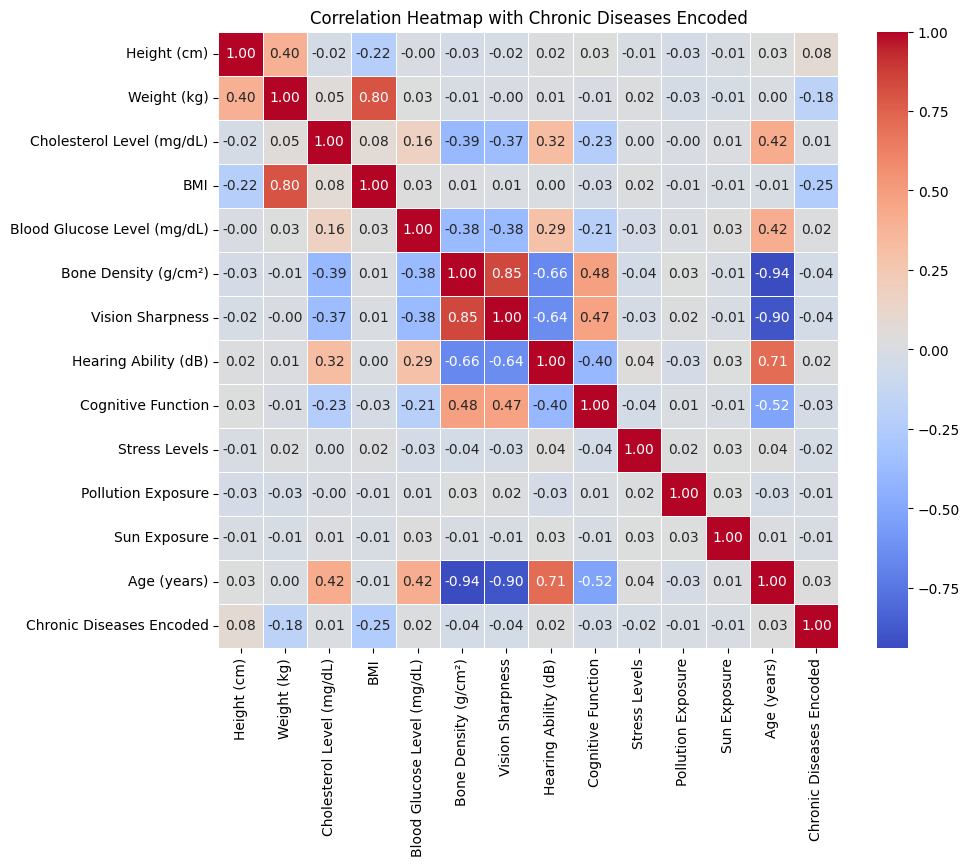

In [30]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap with the target variable 'Chronic Diseases Encoded'
correlation_target = df[numerical_columns].copy()
correlation_target['Chronic Diseases Encoded'] = df['Chronic Diseases Encoded']

# Calculate correlations with the target variable
corr_target = correlation_target.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_target, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap with Chronic Diseases Encoded')
plt.show()

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select the numerical features (exclude the target and categorical columns)
numerical_columns = df.select_dtypes(include='number').drop(columns=['Chronic Diseases Encoded'])

# Add constant for VIF calculation
X = add_constant(numerical_columns)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIFs
print(vif_data)


                        Feature           VIF
0                         const  13421.477988
1                   Height (cm)     38.592755
2                   Weight (kg)    102.592488
3     Cholesterol Level (mg/dL)      1.227726
4                           BMI     90.932001
5   Blood Glucose Level (mg/dL)      1.220627
6          Bone Density (g/cm²)      8.333062
7              Vision Sharpness      5.264931
8          Hearing Ability (dB)      2.037676
9            Cognitive Function      1.373314
10                Stress Levels      1.008605
11           Pollution Exposure      1.004446
12                 Sun Exposure      1.003704
13                  Age (years)     14.140227


In [32]:
dfs = df.drop(['Height (cm)','Weight (kg)'],axis=1)

In [33]:
dfs = dfs.drop('Age (years)',axis=1)

In [34]:
numerical_columns = dfs.select_dtypes(include='number').drop(columns=['Chronic Diseases Encoded'])

# Add constant for VIF calculation
X = add_constant(numerical_columns)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIFs
print(vif_data)

                        Feature         VIF
0                         const  311.505950
1     Cholesterol Level (mg/dL)    1.204037
2                           BMI    1.011048
3   Blood Glucose Level (mg/dL)    1.196934
4          Bone Density (g/cm²)    4.094238
5              Vision Sharpness    3.818651
6          Hearing Ability (dB)    1.889414
7            Cognitive Function    1.346290
8                 Stress Levels    1.008500
9            Pollution Exposure    1.002894
10                 Sun Exposure    1.003453


In [35]:
df_encoded = pd.get_dummies(dfs, columns=['Gender', 'Physical Activity Level', 'Smoking Status',
       'Alcohol Consumption', 'Diet', 'Medication Use',
       'Family History', 'Mental Health Status', 'Sleep Patterns',
       'Education Level', 'Income Level'], drop_first=True)

In [36]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2373 entries, 1 to 2999
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Cholesterol Level (mg/dL)         2373 non-null   float64
 1   BMI                               2373 non-null   float64
 2   Blood Glucose Level (mg/dL)       2373 non-null   float64
 3   Bone Density (g/cm²)              2373 non-null   float64
 4   Vision Sharpness                  2373 non-null   float64
 5   Hearing Ability (dB)              2373 non-null   float64
 6   Chronic Diseases                  2373 non-null   object 
 7   Cognitive Function                2373 non-null   float64
 8   Stress Levels                     2373 non-null   float64
 9   Pollution Exposure                2373 non-null   float64
 10  Sun Exposure                      2373 non-null   float64
 11  Chronic Diseases Encoded          2373 non-null   int32  
 12  Gender_Male

#### Training and testing the Random Forest Model

In [37]:
X = df_encoded.drop(columns=['Chronic Diseases Encoded','Chronic Diseases'],axis=1)
y = df_encoded['Chronic Diseases Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1898, 34), (475, 34), (1898,), (475,))

In [39]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [41]:
# Inverse transform the encoded values
y_test_original = le.inverse_transform(y_test)
y_pred_original = le.inverse_transform(y_pred)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_original, y_pred_original))
print("Classification Report:\n", classification_report(y_test_original, y_pred_original))

Accuracy: 0.6210526315789474
Classification Report:
                precision    recall  f1-score   support

     Diabetes       0.33      0.31      0.32        71
Heart Disease       0.40      0.17      0.24        83
 Hypertension       0.42      0.52      0.46        99
         None       0.83      0.94      0.88       222

     accuracy                           0.62       475
    macro avg       0.49      0.48      0.47       475
 weighted avg       0.59      0.62      0.60       475



#### Evaluate feature importance

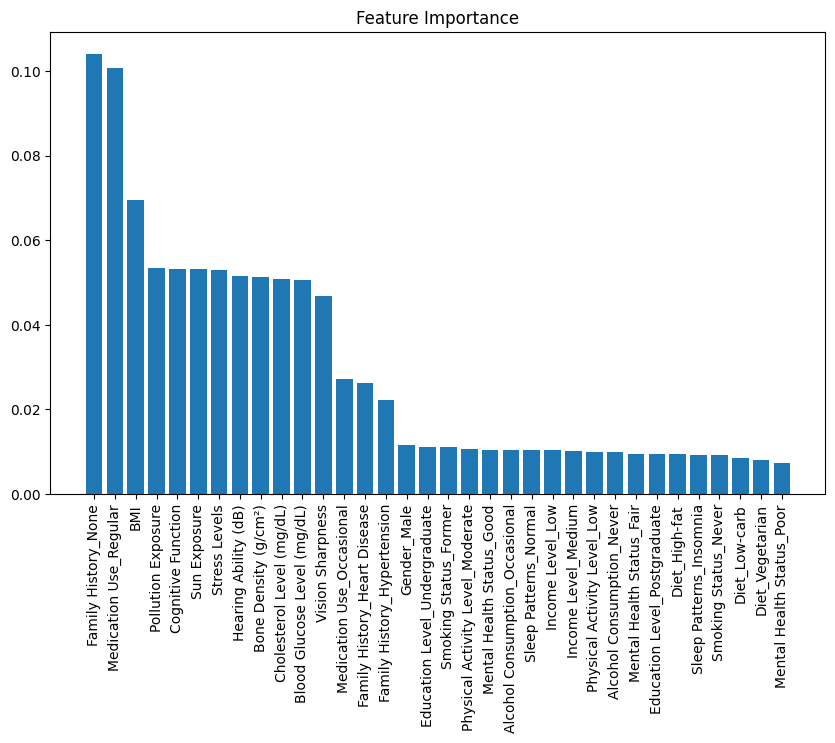

In [42]:
feature_importances = rf_model.feature_importances_
features = X.columns

# Plot feature importance
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()

In [43]:
dfs.drop(['Physical Activity Level', 'Smoking Status', 'Alcohol Consumption', 'Education Level', 'Sleep Patterns', 'Mental Health Status', 'Income Level', 'Diet', 'Gender'],axis=1,inplace=True)

In [44]:
dfs.select_dtypes(include='object').columns

Index(['Chronic Diseases', 'Medication Use', 'Family History'], dtype='object')

In [45]:
df_encoded = pd.get_dummies(dfs, columns=[ 'Medication Use', 'Family History'], drop_first=True)

In [46]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2373 entries, 1 to 2999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cholesterol Level (mg/dL)     2373 non-null   float64
 1   BMI                           2373 non-null   float64
 2   Blood Glucose Level (mg/dL)   2373 non-null   float64
 3   Bone Density (g/cm²)          2373 non-null   float64
 4   Vision Sharpness              2373 non-null   float64
 5   Hearing Ability (dB)          2373 non-null   float64
 6   Chronic Diseases              2373 non-null   object 
 7   Cognitive Function            2373 non-null   float64
 8   Stress Levels                 2373 non-null   float64
 9   Pollution Exposure            2373 non-null   float64
 10  Sun Exposure                  2373 non-null   float64
 11  Chronic Diseases Encoded      2373 non-null   int32  
 12  Medication Use_Occasional     2373 non-null   bool   
 13  Medicati

In [47]:
X = df_encoded.drop(columns=['Chronic Diseases Encoded','Chronic Diseases'],axis=1)
y = df_encoded['Chronic Diseases Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1898, 15), (475, 15), (1898,), (475,))

In [49]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
y_pred = rf_model.predict(X_test)

In [51]:
# Inverse transform the encoded values
y_test_original = le.inverse_transform(y_test)
y_pred_original = le.inverse_transform(y_pred)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_original, y_pred_original))
print("Classification Report:\n", classification_report(y_test_original, y_pred_original))

Accuracy: 0.6021052631578947
Classification Report:
                precision    recall  f1-score   support

     Diabetes       0.27      0.25      0.26        71
Heart Disease       0.37      0.18      0.24        83
 Hypertension       0.38      0.42      0.40        99
         None       0.83      0.95      0.88       222

     accuracy                           0.60       475
    macro avg       0.46      0.45      0.45       475
 weighted avg       0.57      0.60      0.58       475



#### Hyperparameter tuning

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_random
from scipy.stats import expon as sp_expon

In [53]:
params = {'n_estimators': sp_randint(10, 100),
              'max_depth': sp_randint(1, 40),
              'max_features': sp_random(0.1, 0.9),
              'min_samples_leaf': sp_randint(2, 50)}

rs = RandomizedSearchCV(estimator=rf_model, param_distributions=params, scoring='accuracy', cv=3, n_iter=25, random_state=42)

In [54]:
rs.fit(X_train, y_train)
print(rs.best_params_)

{'max_depth': 3, 'max_features': 0.8739463660626885, 'min_samples_leaf': 8, 'n_estimators': 30}


In [55]:
rf_model = RandomForestClassifier(max_depth= 3, min_samples_leaf= 8, max_features= 0.8739463660626885,n_estimators=20, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=0.8739463660626885,
                       min_samples_leaf=8, n_estimators=20, random_state=42)

In [56]:
y_pred = rf_model.predict(X_test)

In [57]:
# Inverse transform the encoded values
y_test_original = le.inverse_transform(y_test)
y_pred_original = le.inverse_transform(y_pred)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_original, y_pred_original))
print("Classification Report:\n", classification_report(y_test_original, y_pred_original))

Accuracy: 0.6126315789473684
Classification Report:
                precision    recall  f1-score   support

     Diabetes       0.25      0.20      0.22        71
Heart Disease       0.00      0.00      0.00        83
 Hypertension       0.38      0.63      0.47        99
         None       0.84      0.97      0.90       222

     accuracy                           0.61       475
    macro avg       0.37      0.45      0.40       475
 weighted avg       0.51      0.61      0.55       475



#### XGBoost Model

In [58]:
xgb_model = xgb.XGBClassifier(
    max_depth=3,
    learning_rate=0.1,  # Default learning rate
    n_estimators=20,  # Number of trees, similar to Random Forest
    subsample=0.8739463660626885,  # Equivalent to max_features for sampling
    objective='multi:softprob',  # Use 'multi:softprob' for probabilities
    num_class=len(le.classes_),  # Number of unique classes
    random_state=42
)

# Fit the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None, num_class=4,
              num_parallel_tree=None, ...)

In [59]:
# Make predictions
y_pred = xgb_model.predict(X_test)

# Inverse transform the encoded values
y_test_original = le.inverse_transform(y_test)
y_pred_original = le.inverse_transform(y_pred)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_original, y_pred_original))
print("Classification Report:\n", classification_report(y_test_original, y_pred_original))

Accuracy: 0.5852631578947368
Classification Report:
                precision    recall  f1-score   support

     Diabetes       0.21      0.14      0.17        71
Heart Disease       0.21      0.04      0.06        83
 Hypertension       0.32      0.51      0.40        99
         None       0.83      0.97      0.89       222

     accuracy                           0.59       475
    macro avg       0.39      0.41      0.38       475
 weighted avg       0.52      0.59      0.54       475



#### Hypertune the XGBoost model

In [60]:
# Define the parameter distribution for XGBoost
params = {
    'n_estimators': sp_randint(10, 100),          # Number of trees
    'max_depth': sp_randint(1, 40),              # Tree depth
    'learning_rate': sp_random(0.01, 0.2),      # Learning rate
    'subsample': sp_random(0.1, 0.9),           # Subsampling ratio
    'colsample_bytree': sp_random(0.1, 0.9),    # Feature sampling ratio
    'gamma': sp_random(0, 5),                   # Regularization term
    'min_child_weight': sp_randint(1, 50)        # Minimum child weight
}

# Instantiate the XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softprob', num_class=len(le.classes_), random_state=42)

# Setup RandomizedSearchCV
rs = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=params,
    scoring='accuracy',
    cv=3,          # 3-fold cross-validation
    n_iter=25,     # Number of iterations
    random_state=42,
    verbose=2,
    n_jobs=-1      # Use all available cores
)

# Fit RandomizedSearchCV
rs.fit(X_train, y_train)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B985BD1E50>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B983B04290>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B985BD19D0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001B983B3D340>},
                   random_state=42, scoring='accuracy', verbose=2)

In [61]:
print(rs.best_params_)

{'colsample_bytree': 0.8984914683186939, 'gamma': 2.3610746258097466, 'learning_rate': 0.03391884918766034, 'max_depth': 14, 'min_child_weight': 3, 'n_estimators': 10, 'subsample': 0.7495565690483859}


In [62]:
# Define the best parameters
best_params = {
    'colsample_bytree': 0.8984914683186939,
    'gamma': 2.3610746258097466,
    'learning_rate': 0.03391884918766034,
    'max_depth': 14,
    'min_child_weight': 3,
    'n_estimators': 10,
    'subsample': 0.7495565690483859
}

# Instantiate the XGBClassifier with the best parameters
best_xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',  # Ensure this matches your use case
    num_class=len(le.classes_), # Number of classes in your label encoder
    random_state=42,            # Consistent results
    **best_params               # Apply the best parameters
)

# Fit the model to your training data
best_xgb_model.fit(X_train, y_train)

y_pred = best_xgb_model.predict(X_test)

In [63]:
# Inverse transform the encoded values
y_test_original = le.inverse_transform(y_test)
y_pred_original = le.inverse_transform(y_pred)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_original, y_pred_original))
print("Classification Report:\n", classification_report(y_test_original, y_pred_original))

Accuracy: 0.6105263157894737
Classification Report:
                precision    recall  f1-score   support

     Diabetes       0.29      0.25      0.27        71
Heart Disease       0.38      0.18      0.24        83
 Hypertension       0.37      0.44      0.41        99
         None       0.84      0.96      0.89       222

     accuracy                           0.61       475
    macro avg       0.47      0.46      0.45       475
 weighted avg       0.58      0.61      0.58       475



#### Logistic Regresssion

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
# Initialize Logistic Regression model
clf = LogisticRegression(
    multi_class='multinomial',  # Use 'ovr' for One-vs-Rest or 'multinomial' for softmax
    solver='lbfgs',            # Recommended solver for small/medium datasets
    random_state=42,
    max_iter=1000000
)

# Fit the model to the training data
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000000, multi_class='multinomial', random_state=42)

In [66]:
# Predict on test data
y_pred = clf.predict(X_test)


# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.6

Classification Report:
                precision    recall  f1-score   support

     Diabetes       0.33      0.21      0.26        71
Heart Disease       0.26      0.11      0.15        83
 Hypertension       0.34      0.48      0.40        99
         None       0.84      0.96      0.89       222

     accuracy                           0.60       475
    macro avg       0.44      0.44      0.43       475
 weighted avg       0.56      0.60      0.57       475



#### Stacking Classifier

In [67]:
from sklearn.ensemble import StackingClassifier
estimators = [('xgb', xgb.XGBClassifier(objective='multi:softprob', num_class=len(le.classes_), random_state=42, **best_params)),
('rfc', RandomForestClassifier(max_depth= 3, min_samples_leaf= 8, max_features= 0.8739463660626885,n_estimators=20, random_state=42)), ('clf', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42))]

clf_log = StackingClassifier(estimators=estimators, stack_method='predict_proba', 
                         final_estimator=LogisticRegression())

In [70]:
clf_log.fit(X_train, y_train)
y_pred_train = clf_log.predict(X_train)
y_prob_train = clf_log.predict_proba(X_train)[:,1]

y_pred_test = clf_log.predict(X_test)
y_prob_test = clf_log.predict_proba(X_test)[:,1]

print('Accuracy of Stacked Algos-Train: ', accuracy_score( y_train,y_pred_train))
print("\nClassification Report-Test:\n", classification_report(y_train, y_pred_train, target_names=le.classes_))

print('\nAccuracy of Stacked Algos-Test: ', accuracy_score( y_test,y_pred_test))

print("\nClassification Report-Test:\n", classification_report(y_test, y_pred_test, target_names=le.classes_))

Accuracy of Stacked Algos-Train:  0.6053740779768177

Classification Report-Test:
                precision    recall  f1-score   support

     Diabetes       0.45      0.10      0.17       328
Heart Disease       0.20      0.00      0.01       305
 Hypertension       0.40      0.82      0.54       442
         None       0.83      0.91      0.87       823

     accuracy                           0.61      1898
    macro avg       0.47      0.46      0.40      1898
 weighted avg       0.56      0.61      0.53      1898


Accuracy of Stacked Algos-Test:  0.6021052631578947

Classification Report-Test:
                precision    recall  f1-score   support

     Diabetes       0.24      0.08      0.12        71
Heart Disease       0.00      0.00      0.00        83
 Hypertension       0.34      0.68      0.45        99
         None       0.84      0.96      0.90       222

     accuracy                           0.60       475
    macro avg       0.36      0.43      0.37       475
 wei